In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data=pd.read_csv('Annex.csv')

In [4]:
data.head()

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,...,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
0,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,38,0,1,4073
1,G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,1,19
2,E,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,1,17
3,L,0,0,0,0,0,0,0,0,0,...,0,1,0,7,0,0,28,0,1,18
4,G,0,0,0,0,0,0,0,0,0,...,27,0,0,6,0,0,33,0,1,18


In [5]:
data.shape

(2000, 51)

In [6]:
def new_column(value):
  if value == "E":
    return 0
  if value == "G":
    return 1
  else:
    return 2

data['label_family']= data['family'].apply(new_column)

In [7]:
data['family'].value_counts()

G    1000
E     800
L     200
Name: family, dtype: int64

In [8]:
data['label_family'].value_counts()

1    1000
0     800
2     200
Name: label_family, dtype: int64

In [9]:
df=data.copy()
data.columns

Index(['family', 'proc_pid', 'file', 'urls', 'type', 'name', 'ext_urls',
       'path', 'program', 'info', 'positives', 'families', 'description',
       'sign_name', 'sign_stacktrace', 'arguments', 'api', 'category',
       'imported_dll_count', 'dll', 'pe_res_name', 'filetype', 'pe_sec_name',
       'entropy', 'hosts', 'requests', 'mitm', 'domains', 'dns_servers', 'tcp',
       'udp', 'dead_hosts', 'proc', 'beh_command_line', 'process_path',
       'tree_command_line', 'children', 'tree_process_name', 'command_line',
       'regkey_read', 'directory_enumerated', 'regkey_opened', 'file_created',
       'wmi_query', 'dll_loaded', 'regkey_written', 'file_read', 'apistats',
       'errors', 'action', 'log', 'label_family'],
      dtype='object')

In [10]:
network_realted_features= ['urls','hosts','requests','mitm','domains','dns_servers',
                           'tcp','udp','dead_hosts','label_family']
API_Calls_DLL_Usage_features=['api','imported_dll_count','dll','label_family']
File_Resource_Characteristics_features=['file','name','path','program','pe_res_name','filetype',
                                        'pe_sec_name','entropy','label_family']
Process_Execution_Behavior_features=['proc_pid','process_path','beh_command_line',
                            'tree_command_line','children','tree_process_name','command_line','label_family']
Registry_File_System_Interactions_features=['regkey_read','directory_enumerated','regkey_opened','file_created','wmi_query',
                                            'dll_loaded','regkey_written','file_read','label_family']
Miscellaneous_Info_Statistics_features=['info','positives','families','description','sign_name',
                                        'sign_stacktrace','arguments',
                                        'apistats',
                                        'errors', 'action','log','label_family']

In [11]:
network=data[network_realted_features]
Apicalls=data[API_Calls_DLL_Usage_features]
fileresource=data[File_Resource_Characteristics_features]
pro_exe=data[Process_Execution_Behavior_features]
rfsm=data[Registry_File_System_Interactions_features]
mis=data[Miscellaneous_Info_Statistics_features]
mis.head()

,info,positives,families,description,sign_name,sign_stacktrace,arguments,apistats,errors,action,log,label_family
0,0,1,0,8,8,0,0,38,0,1,4073,0
1,0,1,0,1,1,0,0,7,0,1,19,1
2,0,1,0,3,3,0,1,8,0,1,17,0
3,0,1,0,10,10,0,5,28,0,1,18,2
4,0,1,0,6,6,0,2,33,0,1,18,1


In [12]:
mis['families'].value_counts()

0    1739
1     261
Name: families, dtype: int64

In [13]:
Apicalls.head()

,api,imported_dll_count,dll,label_family
0,0,1,6,0
1,0,1,3,1
2,1,1,6,0
3,5,1,3,2
4,2,1,6,1


In [14]:
fileresource.head()

,file,name,path,program,pe_res_name,filetype,pe_sec_name,entropy,label_family
0,0,0,0,0,1,1,6,6,0
1,0,0,0,0,1,1,3,3,1
2,1,0,0,0,2,2,4,4,0
3,0,0,0,0,0,0,5,5,2
4,0,0,0,0,31,31,3,3,1


In [15]:
pro_exe.head()

,proc_pid,process_path,beh_command_line,tree_command_line,children,tree_process_name,command_line,label_family
0,0,3,3,3,0,3,0,0
1,0,2,2,2,0,2,0,1
2,1,2,2,2,0,2,0,0
3,0,1,1,1,0,1,1,2
4,0,2,2,2,0,2,0,1


In [16]:
rfsm.head()

,regkey_read,directory_enumerated,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,label_family
0,11,5,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,66,0,0,1,0,7,0,0,2
4,11,0,27,0,0,6,0,0,1


In [17]:
    ## Network Analysis

In [18]:
network.head()

,urls,hosts,requests,mitm,domains,dns_servers,tcp,udp,dead_hosts,label_family
0,0,20,19,0,18,2,35,28,0,0
1,0,3,4,0,4,1,2,14,0,1
2,0,14,14,0,13,2,26,22,0,0
3,0,21,18,0,17,2,38,29,1,2
4,0,5,6,0,5,1,4,23,0,1


In [19]:
data['dns_servers'].unique()

array([2, 1, 0], dtype=int64)

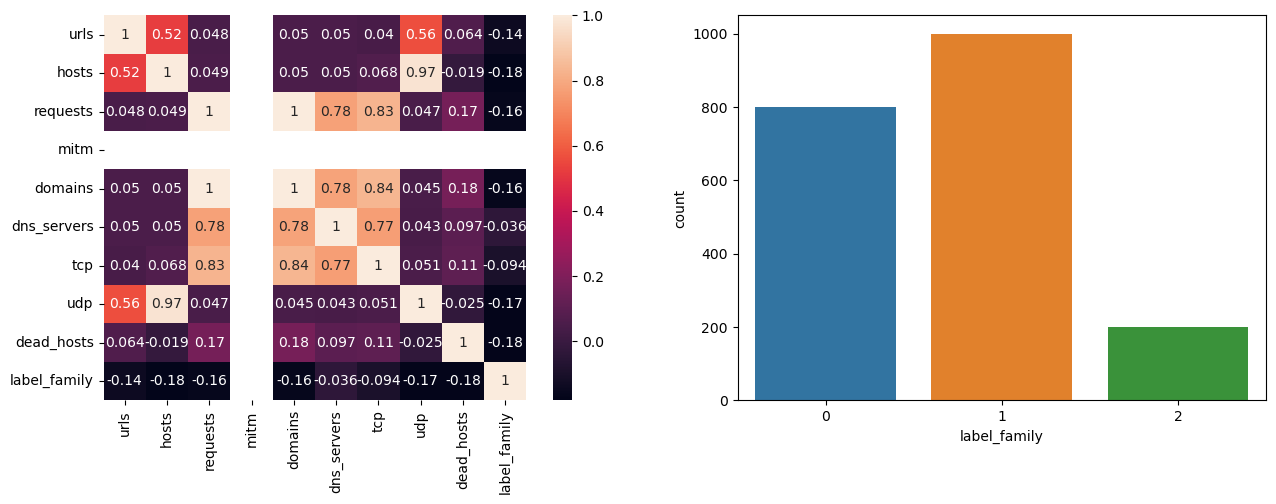

In [20]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.heatmap(network.corr(), annot=True)
plt.subplot(1,2,2)
sns.countplot(data=data, x='label_family', hue_order='domains');

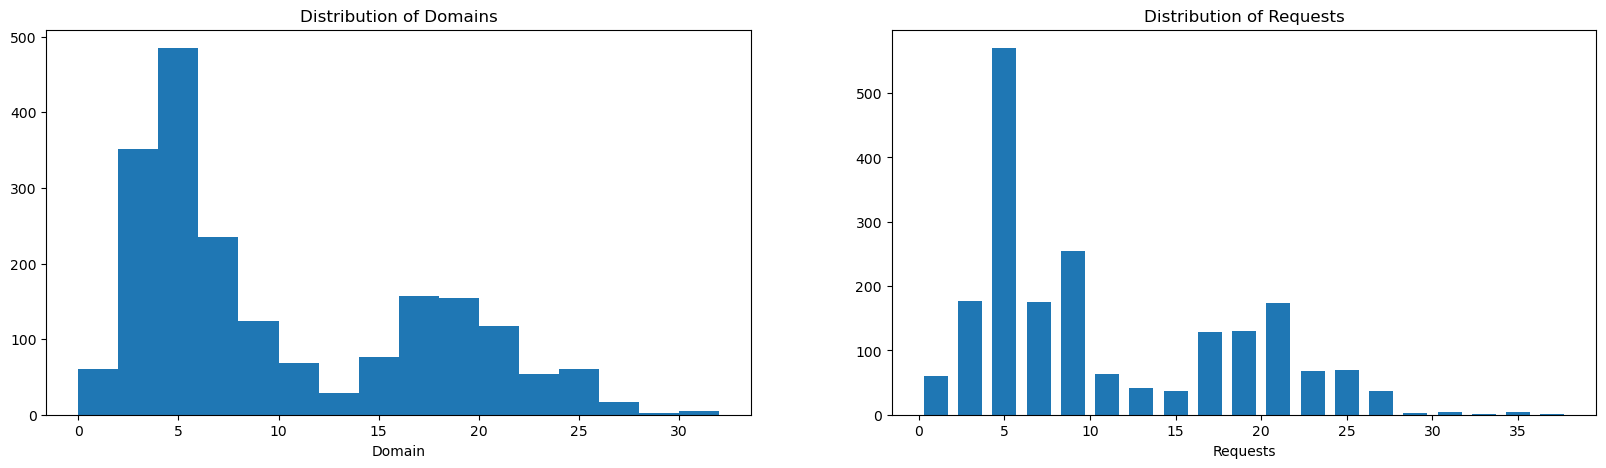

In [21]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
binz=np.arange(0, data['domains'].max(),2)
plt.hist(data['domains'], bins=binz)
plt.title('Distribution of Domains')
plt.xlabel('Domain');


plt.subplot(1,2,2)
bins=np.arange(0, 40,2)
plt.hist(data['requests'], bins=bins, rwidth=0.7)
plt.title('Distribution of Requests')
plt.xlabel('Requests');


In [22]:
#create summary statistics in order to properly bin the features for prpoer distribution
network.describe()

,urls,hosts,requests,mitm,domains,dns_servers,tcp,udp,dead_hosts,label_family
count,2000.000000,2000.000000,2000.000000,2000.0,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.210500,38.173500,10.231500,0.0,9.57600,1.374500,19.831500,69.194500,0.414500,0.700000
std,34.723206,170.319699,7.594521,0.0,7.28435,0.529519,23.082797,313.928244,0.992564,0.640473
min,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,4.000000,0.0,4.00000,1.000000,3.000000,14.000000,0.000000,0.000000
50%,0.000000,8.000000,8.000000,0.0,7.00000,1.000000,7.000000,22.000000,0.000000,1.000000
75%,0.000000,20.000000,17.000000,0.0,16.00000,2.000000,35.000000,29.000000,1.000000,1.000000
max,392.000000,1120.000000,36.000000,0.0,34.00000,2.000000,91.000000,2214.000000,8.000000,2.000000


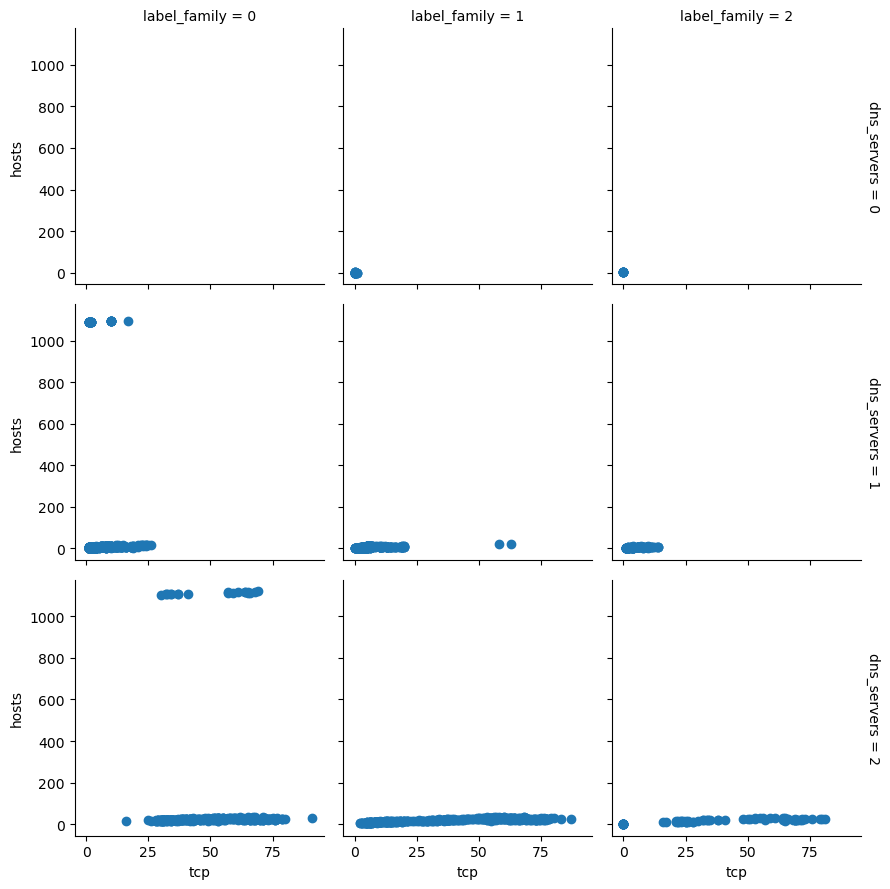

In [23]:
def Facet_status():
    network_status=data[data['label_family'].isin([0,1,2])]
    g=sns.FacetGrid(data=network_status, col='label_family', row='dns_servers', margin_titles=True)
    g.map(plt.scatter, 'tcp','hosts')
Facet_status()


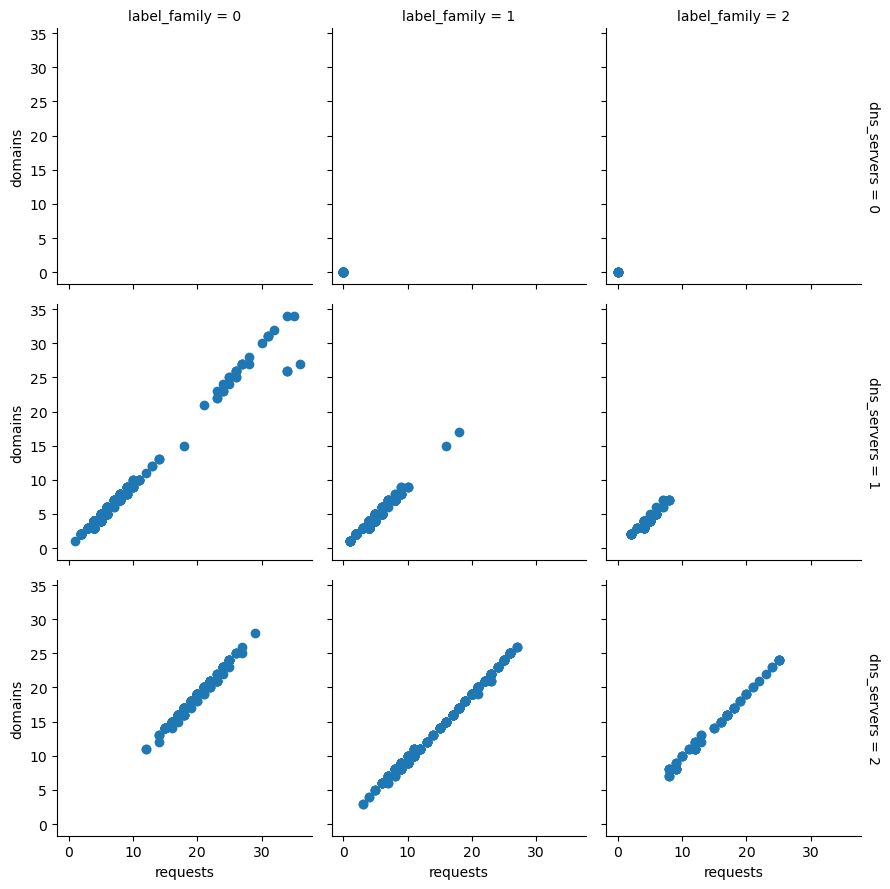

In [24]:
def Facet_status():
    network_status=data[data['label_family'].isin([0,1,2])]
    g=sns.FacetGrid(data=network_status, col='label_family', row='dns_servers', margin_titles=True)
    g.map(plt.scatter, 'requests','domains')
Facet_status()


# <b>API Calls Related Features Analysis

In [25]:
Apicalls.head()

,api,imported_dll_count,dll,label_family
0,0,1,6,0
1,0,1,3,1
2,1,1,6,0
3,5,1,3,2
4,2,1,6,1


In [26]:
Apicalls['dll'].unique()

array([ 6,  3, 82, 12,  4, 10,  9,  1, 13,  7,  8, 14, 16, 11, 17, 26],
      dtype=int64)

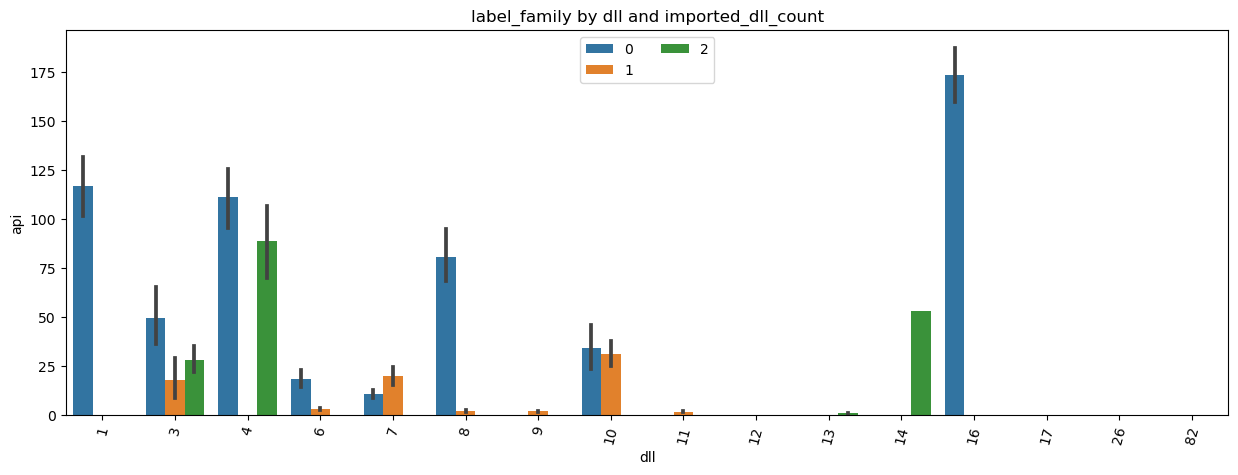

In [27]:
plt.figure(figsize=[15,5])

sns.barplot(data=Apicalls,x='dll',y='api', hue='label_family' )
plt.xticks(rotation=75)
plt.legend(loc=9, ncol=2)
plt.title('label_family by dll and imported_dll_count');


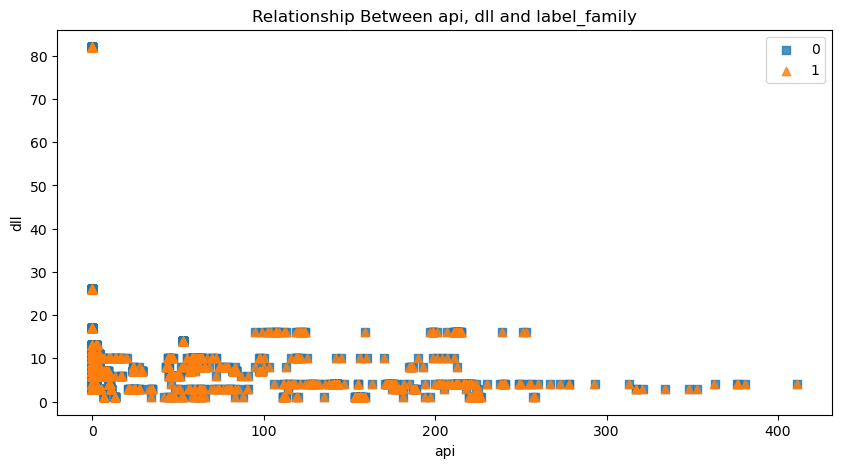

In [28]:
#LoanStatus MonthlyIncome Amountof_Loan
#np.random.seed(2018)
plt.figure(figsize=[10,5])
two_status_df=Apicalls[Apicalls['label_family'].isin([0,1])]
apicalls_markers=[[0,'s'],[1,'^']]

for ltype, markers in apicalls_markers:
    Loan_df=two_status_df[two_status_df['label_family']==ltype]
    sns.regplot(data=data, x='api', y='dll', x_jitter=0.04, fit_reg=False, marker=markers)
plt.xlabel('api')
plt.ylabel('dll')
plt.title('Relationship Between api, dll and label_family')
plt.legend([0,1,2]);

In [29]:
fileresource.head()

,file,name,path,program,pe_res_name,filetype,pe_sec_name,entropy,label_family
0,0,0,0,0,1,1,6,6,0
1,0,0,0,0,1,1,3,3,1
2,1,0,0,0,2,2,4,4,0
3,0,0,0,0,0,0,5,5,2
4,0,0,0,0,31,31,3,3,1


# fileresource Related Features Analysis

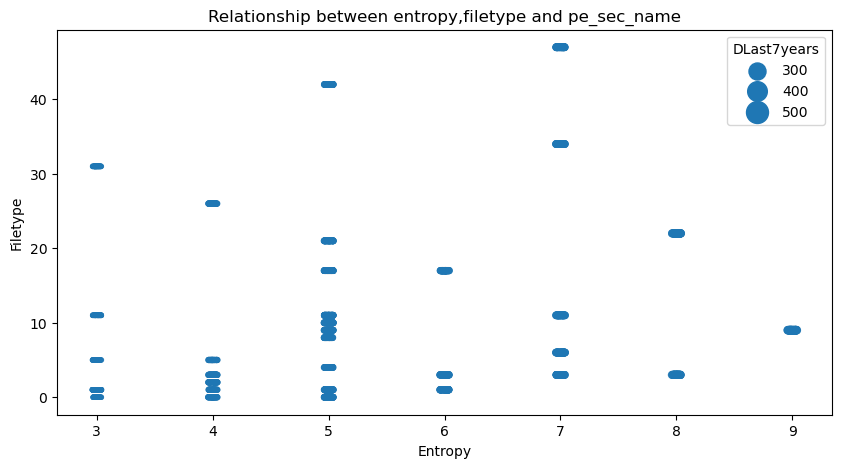

In [30]:
plt.figure(figsize=[10,5])

np.random.seed(1000)
sample= np.random.choice(fileresource.shape[0], 500, replace=False)
data=fileresource.iloc[sample]
base_color=sns.color_palette()[0]
sns.regplot(data=fileresource, x='entropy', y='filetype', x_jitter=0.04, fit_reg=False,
                   scatter_kws={'s':fileresource['pe_sec_name']*3}, color=base_color)
plt.xlabel('Entropy')
plt.ylabel('Filetype')

sizes=[300,400,500]

legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/2, color=base_color))
plt.legend(legend_obj, sizes, title= 'DLast7years')
plt.title('Relationship between entropy,filetype and pe_sec_name');

# pro_exe features analysis

In [31]:
pro_exe.head()

,proc_pid,process_path,beh_command_line,tree_command_line,children,tree_process_name,command_line,label_family
0,0,3,3,3,0,3,0,0
1,0,2,2,2,0,2,0,1
2,1,2,2,2,0,2,0,0
3,0,1,1,1,0,1,1,2
4,0,2,2,2,0,2,0,1


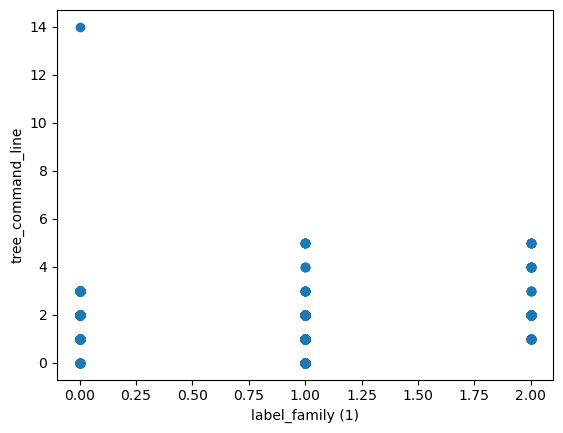

In [32]:
#using matplotlib
plt.scatter(data=pro_exe, x='label_family', y='tree_command_line')
plt.xlabel('label_family (1)')
plt.ylabel('tree_command_line');

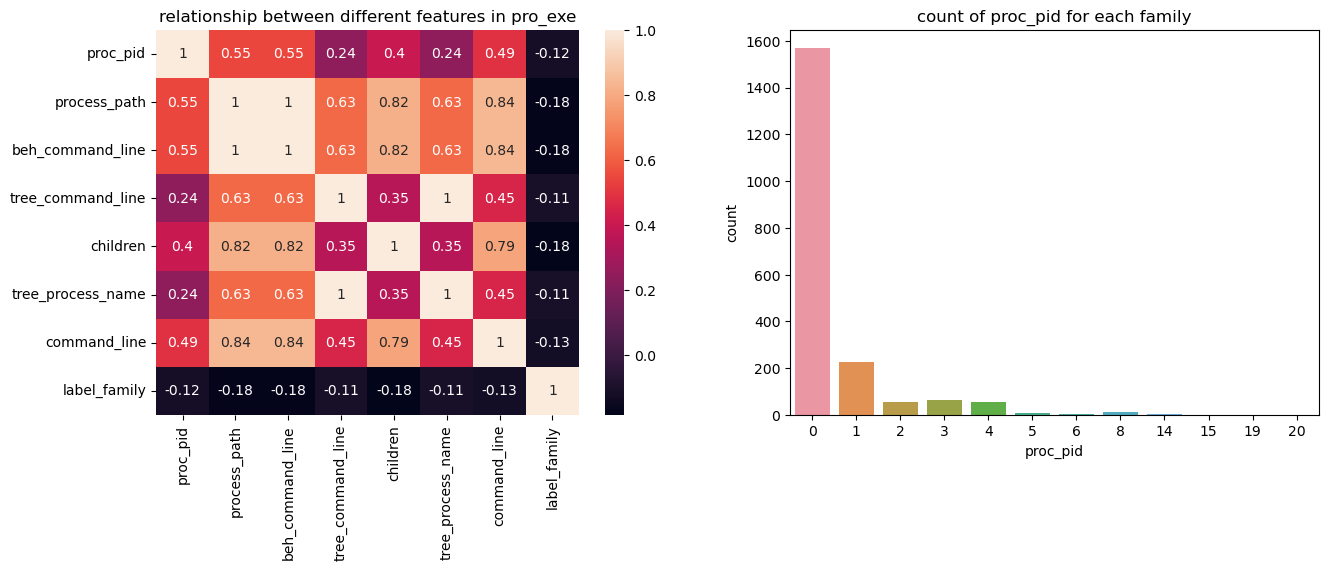

In [33]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

sns.heatmap(pro_exe.corr(), annot=True)
plt.title('relationship between different features in pro_exe')
plt.subplot(1,2,2)
sns.countplot(data=pro_exe, x='proc_pid', hue_order='label_family')
plt.title('count of proc_pid for each family');

# Mis Feature Analysis

In [34]:
mis.head()

,info,positives,families,description,sign_name,sign_stacktrace,arguments,apistats,errors,action,log,label_family
0,0,1,0,8,8,0,0,38,0,1,4073,0
1,0,1,0,1,1,0,0,7,0,1,19,1
2,0,1,0,3,3,0,1,8,0,1,17,0
3,0,1,0,10,10,0,5,28,0,1,18,2
4,0,1,0,6,6,0,2,33,0,1,18,1


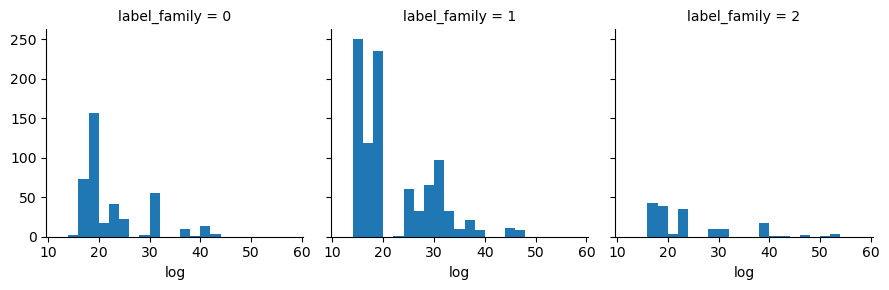

In [35]:
#step1 : Convert the Column you are faceting by into a categorical variable


bins= np.arange(12,58+2, 2)
#create a facetgrid object and select the variable you want to facet by
g=sns.FacetGrid(data=mis, col='label_family', col_wrap=3)
#select a plot type and the variables to be plotted on each
#set the plot function and variable to be plotted as positional arguments
g.map(plt.hist, 'log', bins=bins)

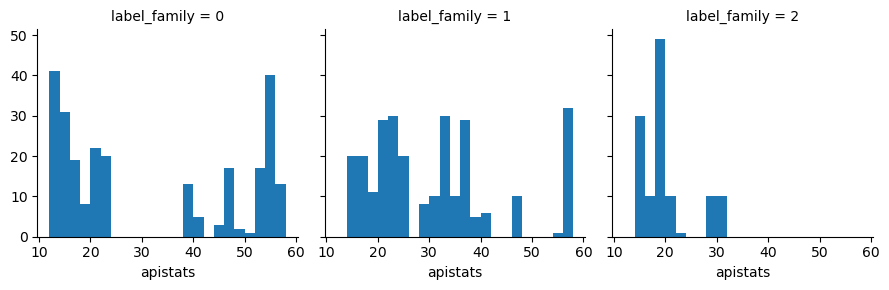

In [36]:
#step1 : Convert the Column you are faceting by into a categorical variable


bins= np.arange(12,58+2, 2)
#create a facetgrid object and select the variable you want to facet by
g=sns.FacetGrid(data=mis, col='label_family', col_wrap=3)
#select a plot type and the variables to be plotted on each
#set the plot function and variable to be plotted as positional arguments
g.map(plt.hist, 'apistats', bins=bins)

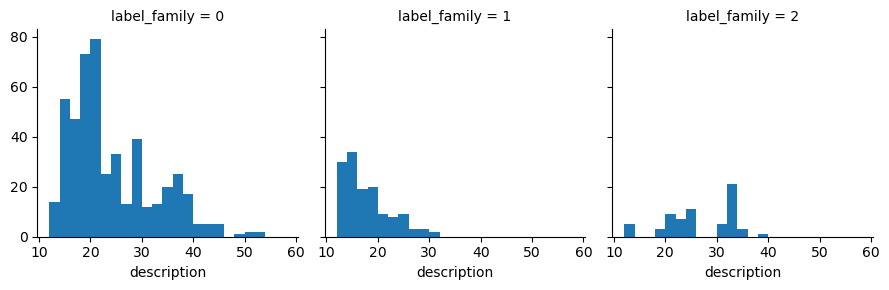

In [37]:
#step1 : Convert the Column you are faceting by into a categorical variable


bins= np.arange(12,58+2, 2)
#create a facetgrid object and select the variable you want to facet by
g=sns.FacetGrid(data=mis, col='label_family', col_wrap=3)
#select a plot type and the variables to be plotted on each
#set the plot function and variable to be plotted as positional arguments
g.map(plt.hist, 'description', bins=bins)

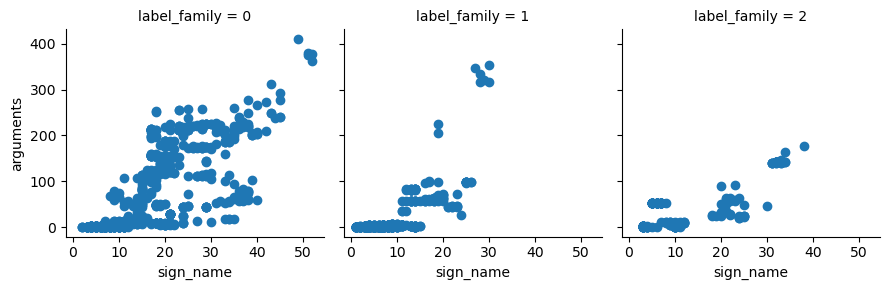

In [38]:
#step1 : Convert the Column you are faceting by into a categorical variable


bins= np.arange(12,58+2, 2)
#create a facetgrid object and select the variable you want to facet by
g=sns.FacetGrid(data=mis, col='label_family', col_wrap=3)
#select a plot type and the variables to be plotted on each
#set the plot function and variable to be plotted as positional arguments
g.map(plt.scatter, 'sign_name','arguments')

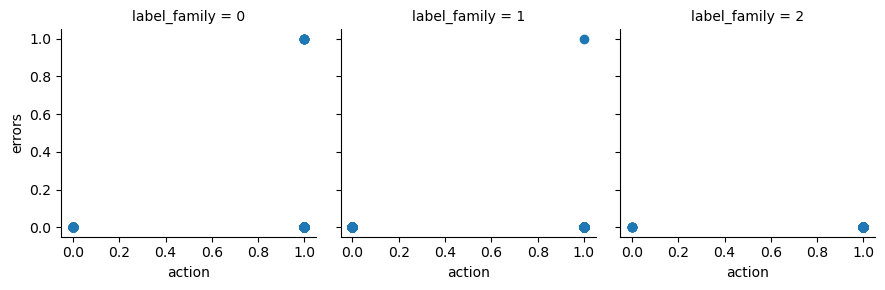

In [39]:
#step1 : Convert the Column you are faceting by into a categorical variable


bins= np.arange(12,58+2, 2)
#create a facetgrid object and select the variable you want to facet by
g=sns.FacetGrid(data=mis, col='label_family', col_wrap=3)
#select a plot type and the variables to be plotted on each
#set the plot function and variable to be plotted as positional arguments
g.map(plt.scatter, 'action','errors')

## Ransomware_versus_Goodware Analysis

In [40]:
df.head()

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,...,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log,label_family
0,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,38,0,1,4073,0
1,G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,1,19,1
2,E,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,1,17,0
3,L,0,0,0,0,0,0,0,0,0,...,1,0,7,0,0,28,0,1,18,2
4,G,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,33,0,1,18,1


In [41]:
data_ransomware=df[df['label_family']== 0 ]
data_ransomware2=df[df['label_family']==2]
ransomware= pd.concat([data_ransomware, data_ransomware2],axis=0)

In [42]:
ransomware['label_family'].value_counts()

0    800
2    200
Name: label_family, dtype: int64

In [43]:
goodware= df[df['label_family']==1]

In [44]:
goodware['label_family'].value_counts()

1    1000
Name: label_family, dtype: int64

In [45]:
ransomware

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,...,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log,label_family
0,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,38,0,1,4073,0
2,E,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,1,17,0
7,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0
9,E,2,2,0,3,3,0,3,0,0,...,0,0,13,0,0,54,0,1,25,0
13,E,0,0,0,0,0,0,0,0,0,...,122,0,10,0,2000,62,0,1,2150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,L,0,0,0,0,0,0,0,0,0,...,0,0,3,0,1,18,0,1,17,2
1988,L,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,19,0,1,19,2
1993,L,2,2,0,3,3,0,3,0,0,...,0,0,0,0,0,14,0,1,22,2
1995,L,0,0,0,0,0,0,0,0,0,...,0,0,3,0,1,18,0,1,17,2


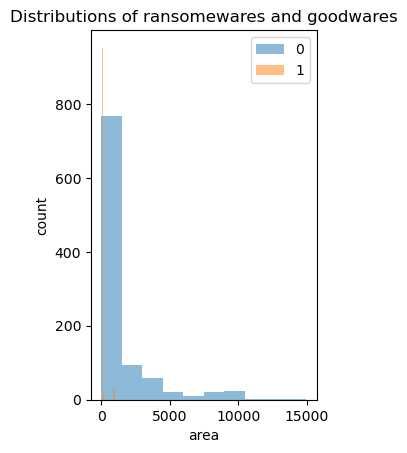

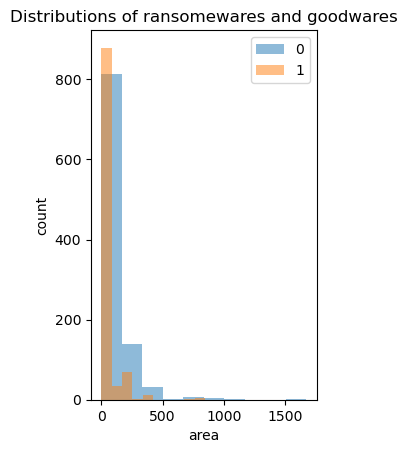

In [46]:

plt.subplot(1,2,1)
plt.hist(ransomware['log'], alpha=0.5,  label=0)
plt.hist(goodware['log'], alpha= 0.5 , label=1)
plt.title('Distributions of ransomewares and goodwares')
plt.xlabel('area')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.hist(ransomware['apistats'], alpha=0.5,  label=0)
plt.hist(goodware['apistats'], alpha= 0.5 , label=1)
plt.title('Distributions of ransomewares and goodwares')
plt.xlabel('area')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()

In [47]:
ransomware_1=ransomware.iloc[:,0:25]
ransomware_2=ransomware.iloc[:,26:]

In [48]:
ransomware_1.columns
def label(value):
    if value == "E":
        return 0
    else:
        return 2
ransomware_1['label_family']= ransomware_1['family'].apply(label)

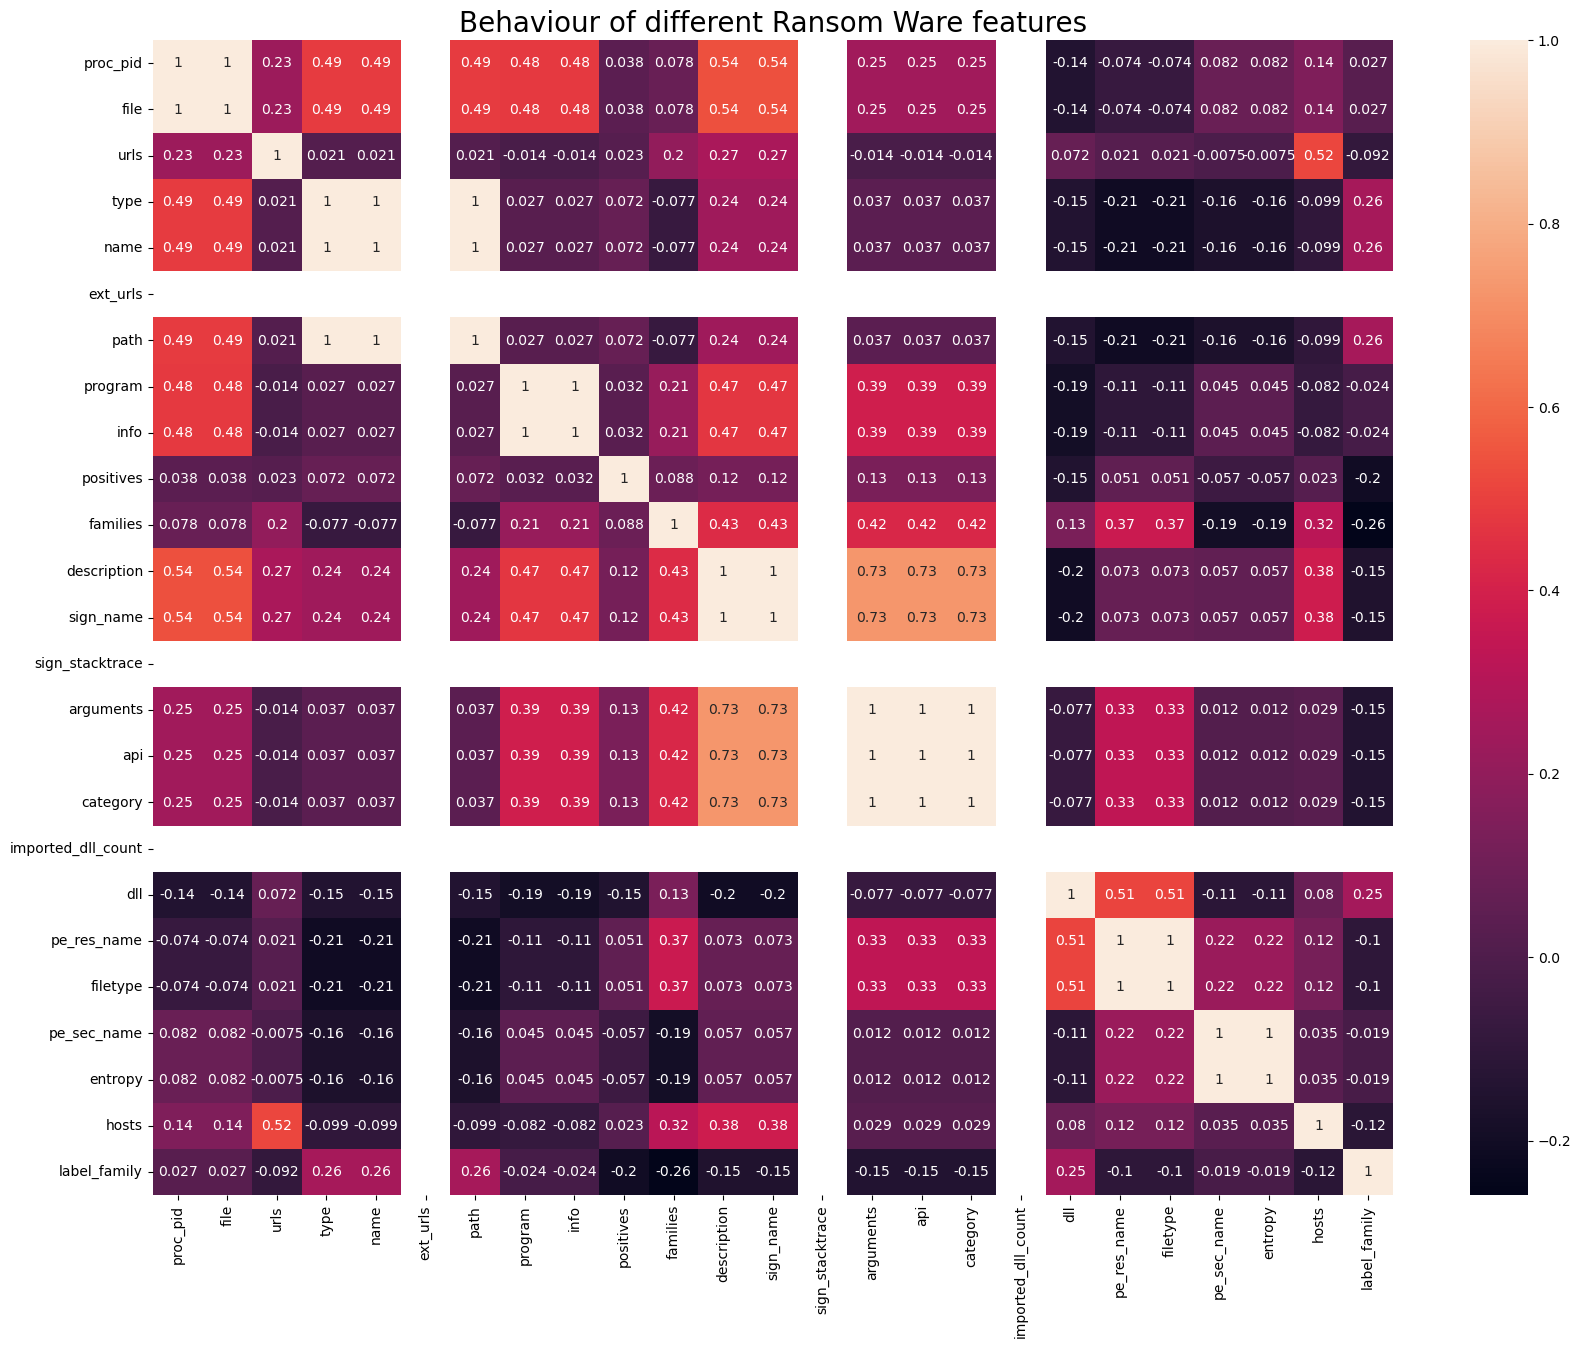

In [49]:
plt.figure(figsize=[20,15])
sns.heatmap(ransomware_1.corr(),annot=True)
plt.title('Behaviour of different Ransom Ware features', fontsize=20);

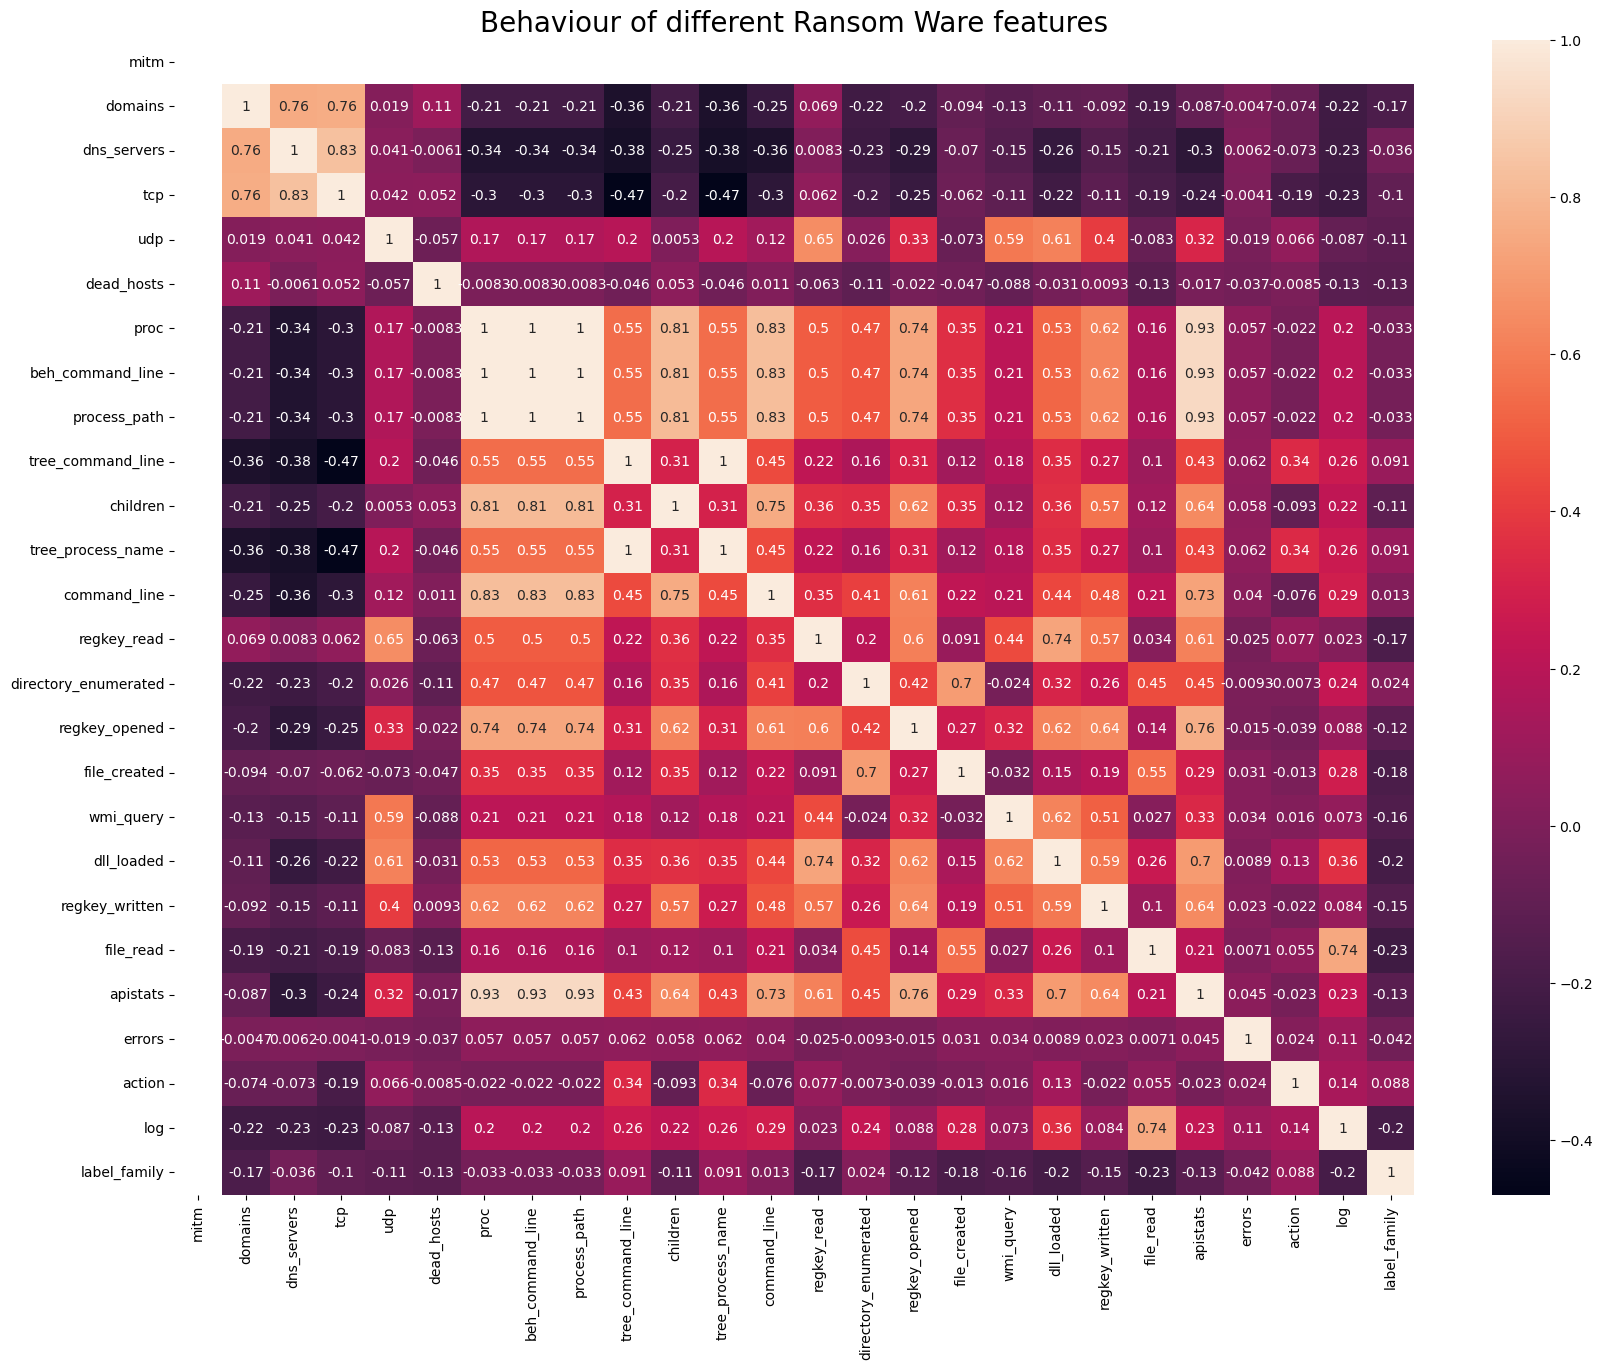

In [50]:
plt.figure(figsize=[20,15])
sns.heatmap(ransomware_2.corr(),annot=True)
plt.title('Behaviour of different Ransom Ware features', fontsize=20);

In [51]:
goodware_1=goodware.iloc[:,0:25]
goodware_2=goodware.iloc[:,26:]

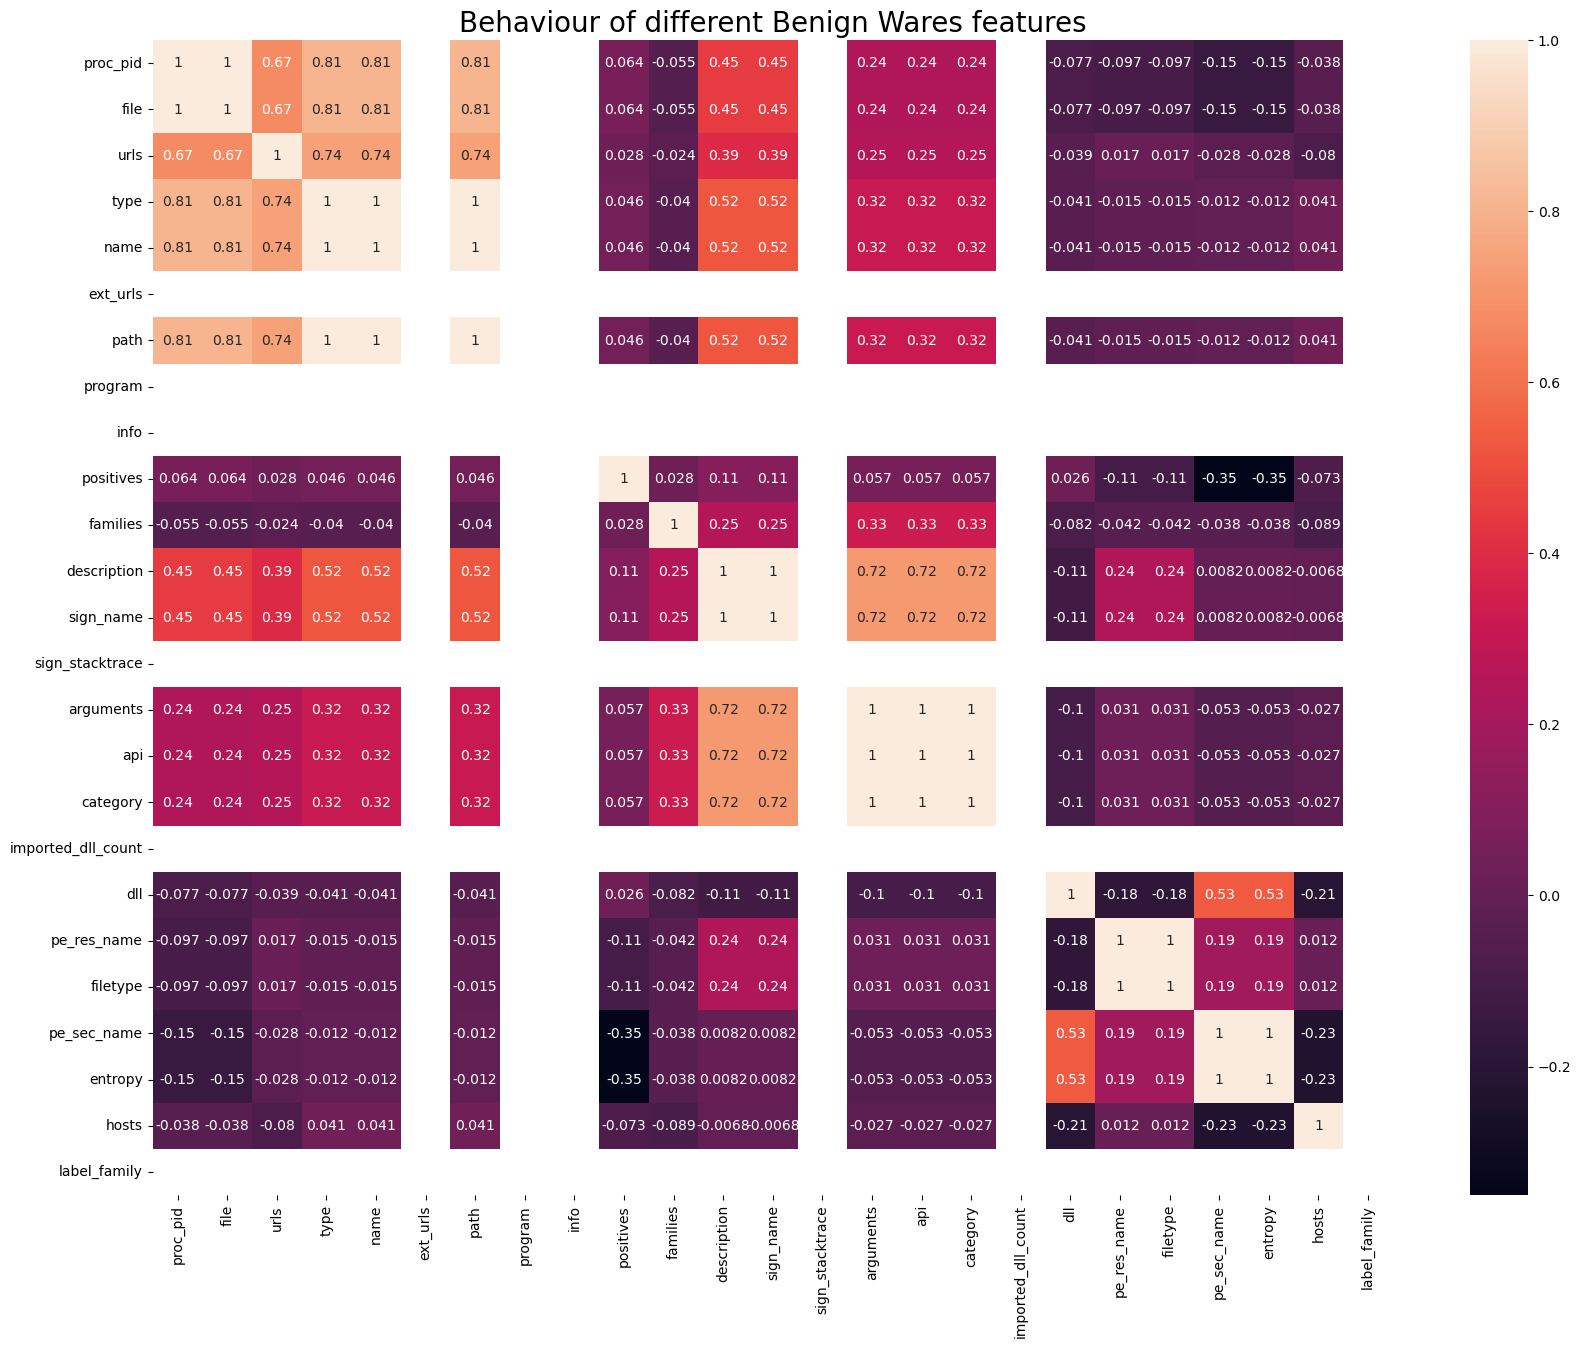

In [52]:
ransomware_1.columns
def labels(value):
    if value == "G":
        return 1
goodware_1['label_family']= goodware_1['family'].apply(labels)
plt.figure(figsize=[20,15])
sns.heatmap(goodware_1.corr(),annot=True)
plt.title('Behaviour of different Benign Wares features', fontsize=20);

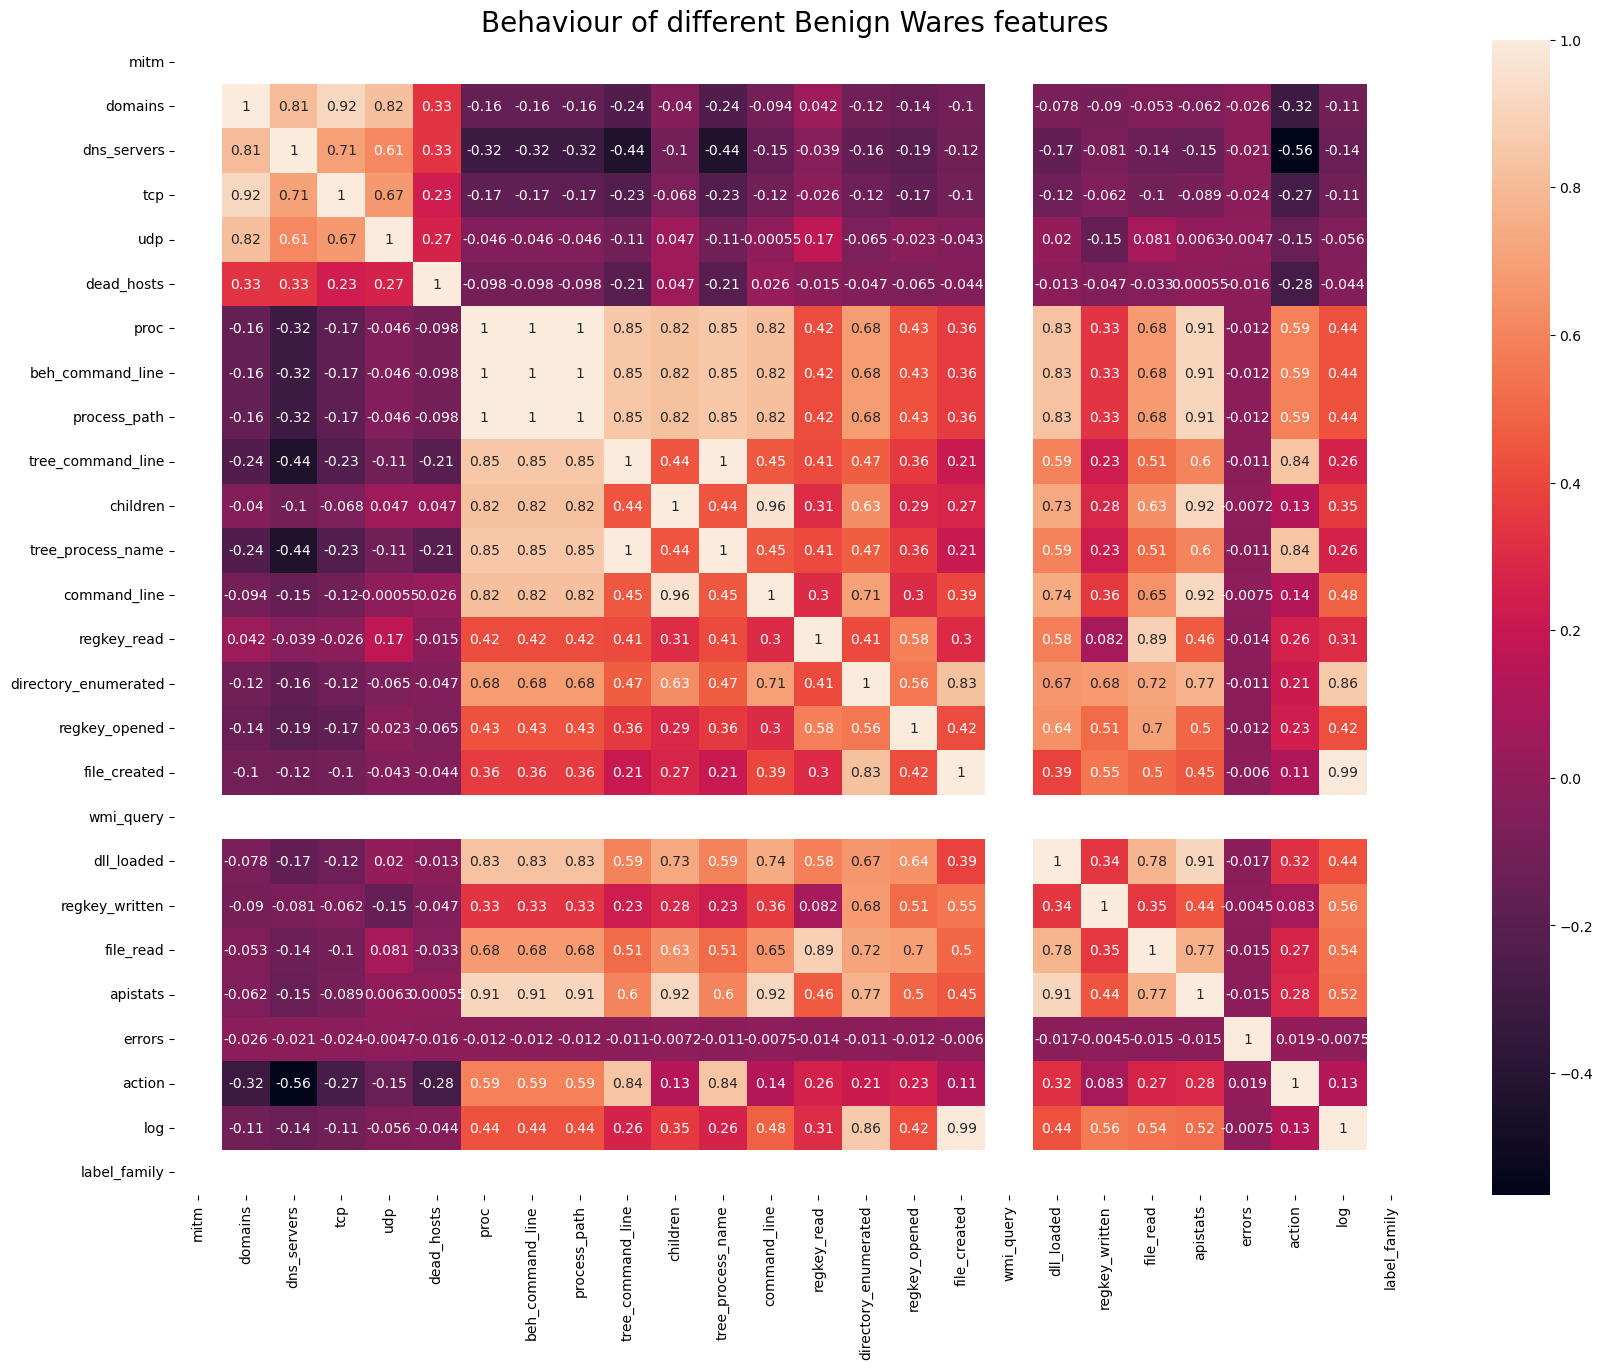

In [53]:
plt.figure(figsize=[20,15])
sns.heatmap(goodware_2.corr(),annot=True)
plt.title('Behaviour of different Benign Wares features', fontsize=20);

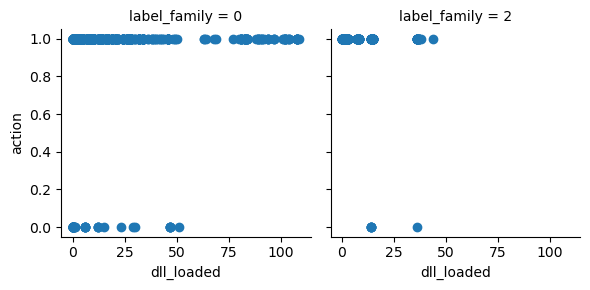

In [54]:
#step1 : Convert the Column you are faceting by into a categorical variable


bins= np.arange(12,58+2, 2)
#create a facetgrid object and select the variable you want to facet by
g=sns.FacetGrid(data=ransomware, col='label_family', col_wrap=2)
#select a plot type and the variables to be plotted on each
#set the plot function and variable to be plotted as positional arguments
g.map(plt.scatter, 'dll_loaded','action')

In [55]:
df.head()

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,...,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log,label_family
0,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,38,0,1,4073,0
1,G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,1,19,1
2,E,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,1,17,0
3,L,0,0,0,0,0,0,0,0,0,...,1,0,7,0,0,28,0,1,18,2
4,G,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,33,0,1,18,1
